# Regression Plot
berbasis scatter plot, kita mau melihat apakah ada trend tertentu dari data yang sudah kita plot tersebar, apakah ada korelasi antara x dan y axis. Kalau ada, korelasi ini bisa ditunjukkan dengan formula matematik, sebuah garis yang memperlihatkan trend diantara titik data.

In [12]:
# import package searborn untuk buat regression plot
import seaborn as sns

# import matplotlib untuk bantuan visualisasi
%matplotlib inline
import matplotlib.pyplot as plt

# import package biasa
import numpy as np
import pandas as pd


In [8]:
# import data
df = pd.read_excel("dataset/Canada.xlsx", 
                   sheet_name="Canada by Citizenship",
                   skiprows=20,
                   skipfooter=2)

# rapiiin data
hapus_kolom = ['Type', 'Coverage', 'AREA', 'REG', 'DEV', 'DevName']
df.drop(columns=hapus_kolom, inplace=True)

df.rename(columns={"OdName":"Country", "AreaName":"Continent", "RegName":"Region"}, inplace=True)

years = range(1980, 2014)

df.set_index("Country", inplace=True)

# membuat dataframe baru untuk merangkum setiap tahun total imigrasi nya berapa
df_total = pd.DataFrame(df[years].sum(axis=0))

# reset index supaya tahunnya jadi kolom, bukan index
df_total.reset_index(inplace=True)

# ganti nama kolom jadi year dan total
df_total.columns = ["year", "total"]

df_total

,year,total
0,1980,99137
1,1981,110563
2,1982,104271
3,1983,75550
4,1984,73417
5,1985,69978
6,1986,86048
7,1987,134771
8,1988,139306
9,1989,164432


### buat regression plot antara years (x-axis) dan total (y_axis)
apakah ada korelasi antara tahun dengan total imigrasi? kita buat regression plot nya

<AxesSubplot:xlabel='year', ylabel='total'>

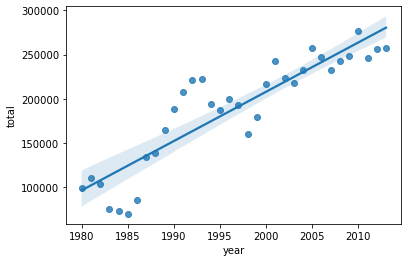

In [9]:
sns.regplot(x="year", y="total", data=df_total)

Text(0.5, 1.0, 'Correlation between Year & Total Immigrants to Canada 1980-2013')

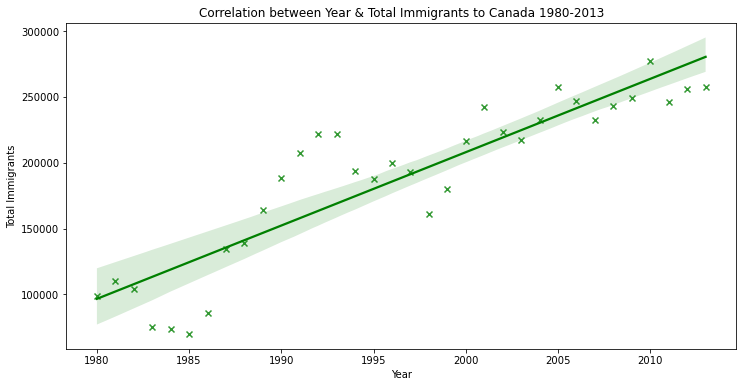

In [15]:
# hasil plot bisa kita percantik dengan banyak opsi dan teknik sesi 7
plt.figure(figsize=(12,6))

regplot_can = sns.regplot(
    x="year", 
    y="total", 
    data=df_total,
    color="green",
    marker="x"
)
regplot_can.set_xlabel("Year")
regplot_can.set_ylabel("Total Immigrants")
regplot_can.set_title("Correlation between Year & Total Immigrants to Canada 1980-2013")